# Paso N°1

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Importamos Dataset
dataset = pd.read_csv('/content/drive/MyDrive/recruitment_data.csv')

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1500 non-null   int64  
 1   Age                  1500 non-null   int64  
 2   Gender               1500 non-null   object 
 3   EducationLevel       1400 non-null   object 
 4   ExperienceYears      1462 non-null   float64
 5   PreviousCompanies    1500 non-null   int64  
 6   DistanceFromCompany  1474 non-null   float64
 7   InterviewScore       1500 non-null   int64  
 8   SkillScore           1500 non-null   int64  
 9   PersonalityScore     1500 non-null   int64  
 10  RecruitmentStrategy  1500 non-null   object 
 11  HiringDecision       1500 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 140.8+ KB


In [65]:
# Validamos carga
dataset.head()

,Unnamed: 0,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,0,26,Female,Bachelor's (Type 2),0.0,3,26.78,48,78,91,Aggressive,1
1,1,39,Female,PhD,12.0,3,25.86,35,68,80,Moderate,1
2,2,48,Male,Bachelor's (Type 2),3.0,2,9.92,20,67,13,Moderate,0
3,3,34,Female,Bachelor's (Type 2),5.0,2,6.41,36,27,70,Conservative,0
4,4,30,Male,Bachelor's (Type 1),6.0,1,43.11,23,52,85,Moderate,0


In [66]:
# Verificar valores faltantes
faltantes = dataset.isnull().sum()
print("Valores faltantes por columna:\n", faltantes)

Valores faltantes por columna:
 Unnamed: 0               0
Age                      0
Gender                   0
EducationLevel         100
ExperienceYears         38
PreviousCompanies        0
DistanceFromCompany     26
InterviewScore           0
SkillScore               0
PersonalityScore         0
RecruitmentStrategy      0
HiringDecision           0
dtype: int64


In [35]:
# Verificar y eliminar duplicados
duplicados = dataset.duplicated().sum()
print("Número de filas duplicadas:", duplicados)
dataset.drop_duplicates(inplace=True)

Número de filas duplicadas: 0


# Paso N°2

In [67]:
# Crear una copia del dataset original
data_copia = dataset.copy() # Se cambió 'data_original' por 'dataset'

print("Dataset duplicado correctamente.")

Dataset duplicado correctamente.


In [71]:
# Ejecutamos un describe (lo hace solo sobre variabes numéricas)
data_copia.describe()

,Unnamed: 0,Age,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,HiringDecision
count,1500.000000,1500.000000,1462.000000,1500.00000,1474.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,749.500000,35.148667,7.691518,3.00200,25.508575,50.564000,51.116000,49.387333,0.310000
std,433.157015,9.252728,4.626492,1.41067,14.541184,28.626215,29.353563,29.353201,0.462647
min,0.000000,20.000000,0.000000,1.00000,1.030000,0.000000,0.000000,0.000000,0.000000
25%,374.750000,27.000000,4.000000,2.00000,12.872500,25.000000,25.750000,23.000000,0.000000
50%,749.500000,35.000000,8.000000,3.00000,25.460000,52.000000,53.000000,49.000000,0.000000
75%,1124.250000,43.000000,12.000000,4.00000,37.740000,75.000000,76.000000,76.000000,1.000000
max,1499.000000,50.000000,15.000000,5.00000,50.970000,100.000000,100.000000,100.000000,1.000000


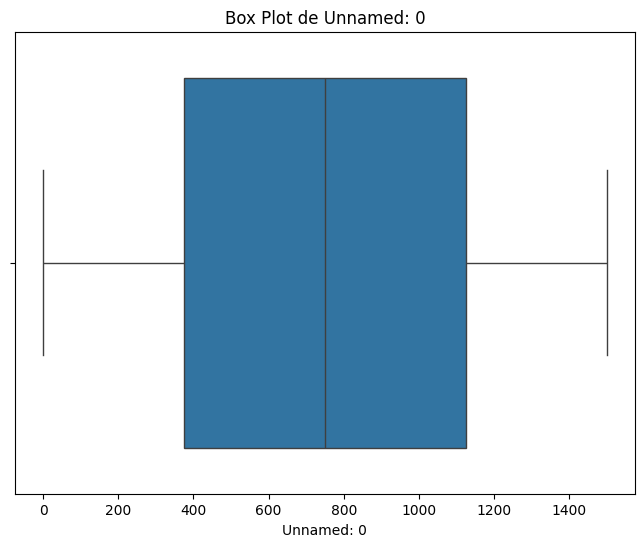

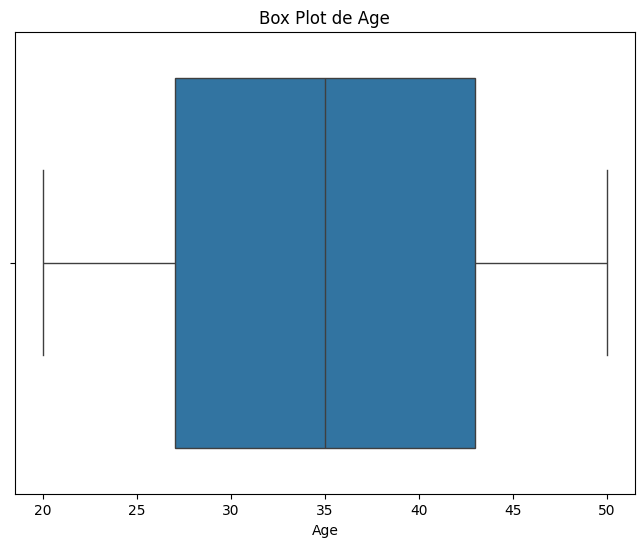

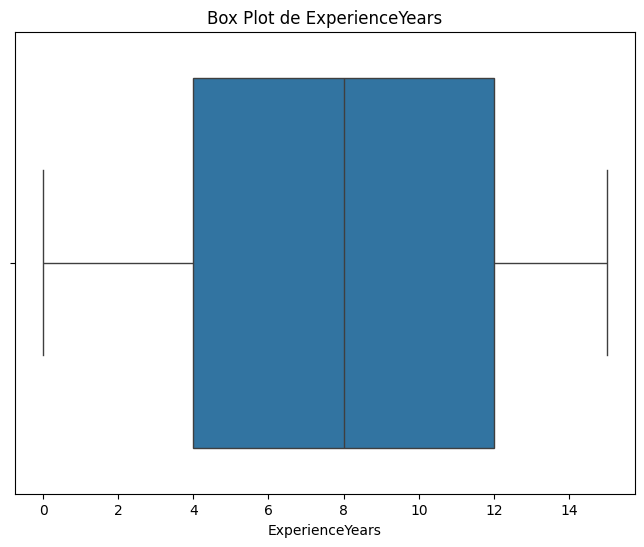

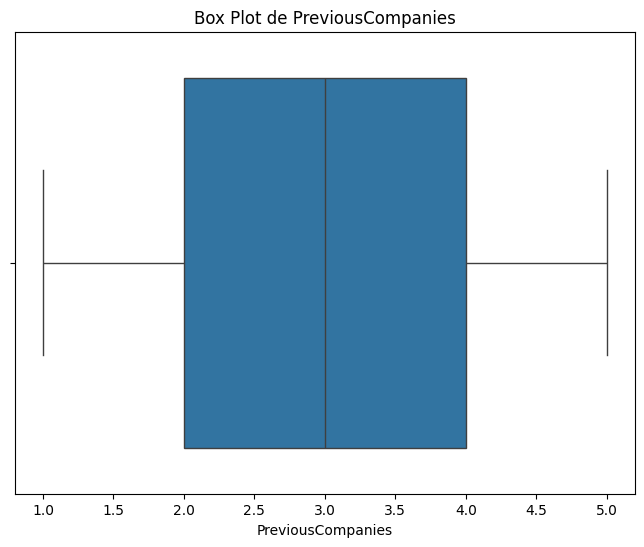

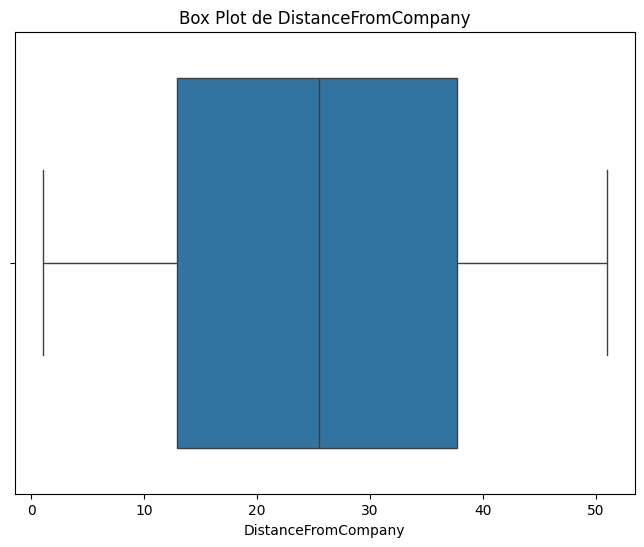

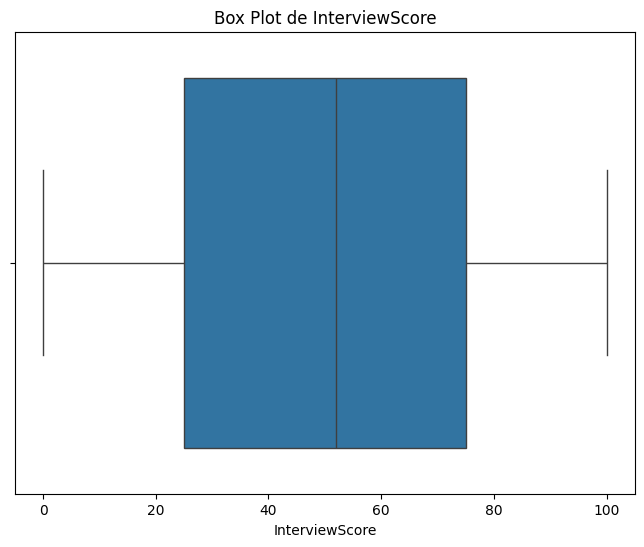

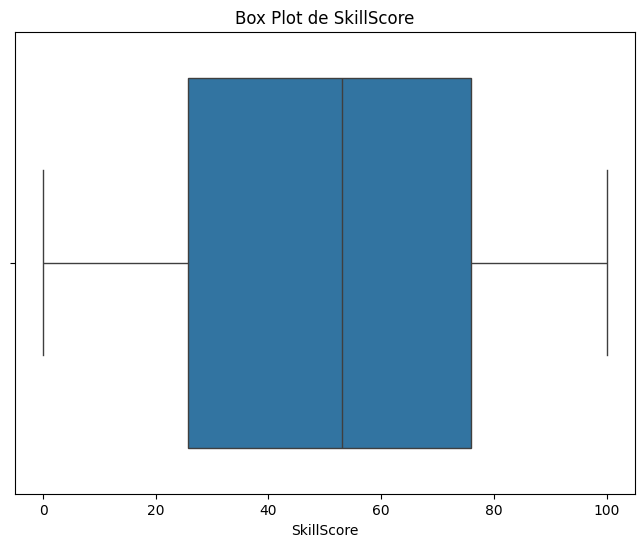

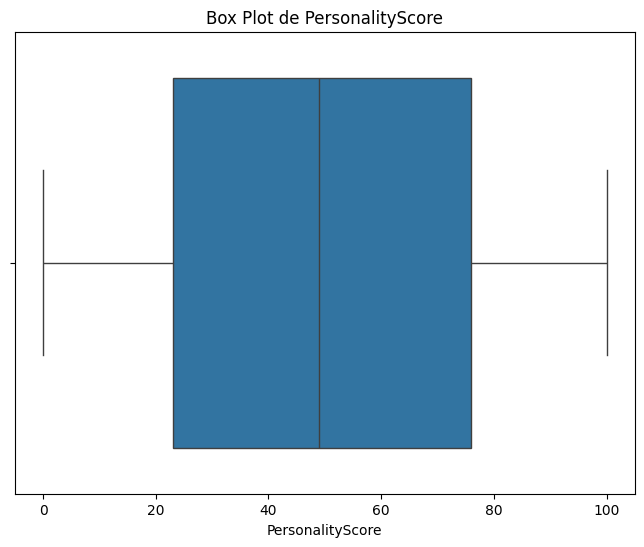

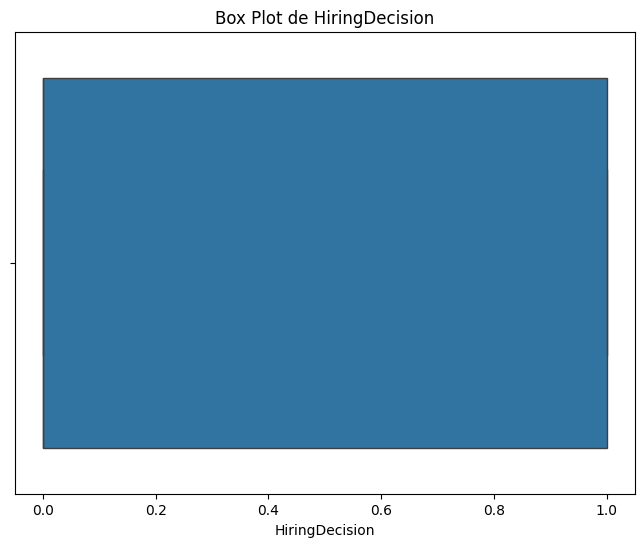

In [81]:
# 4. Análisis de outliers y visualización
# a) Box plots para variables numéricas
for columna in data_copia.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data_copia, x=columna)
    plt.title(f'Box Plot de {columna}')
    plt.show()

In [89]:
# b) Manejo de outliers (ejemplo: usando IQR)
def eliminar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_filtrado = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]

    # Calcula la cantidad de filas eliminadas
    filas_eliminadas = len(df) - len(df_filtrado)
    print(f"Para la columna '{columna}', se eliminaron {filas_eliminadas} filas con outliers.")

    return df_filtrado

# Aplica la función a las columnas numéricas que desees
for columna in ['Age', 'ExperienceYears', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']:
    data_copia = eliminar_outliers_iqr(data_copia, columna)

Para la columna 'Age', se eliminaron 0 filas con outliers.
Para la columna 'ExperienceYears', se eliminaron 0 filas con outliers.
Para la columna 'DistanceFromCompany', se eliminaron 0 filas con outliers.
Para la columna 'InterviewScore', se eliminaron 0 filas con outliers.
Para la columna 'SkillScore', se eliminaron 0 filas con outliers.
Para la columna 'PersonalityScore', se eliminaron 0 filas con outliers.


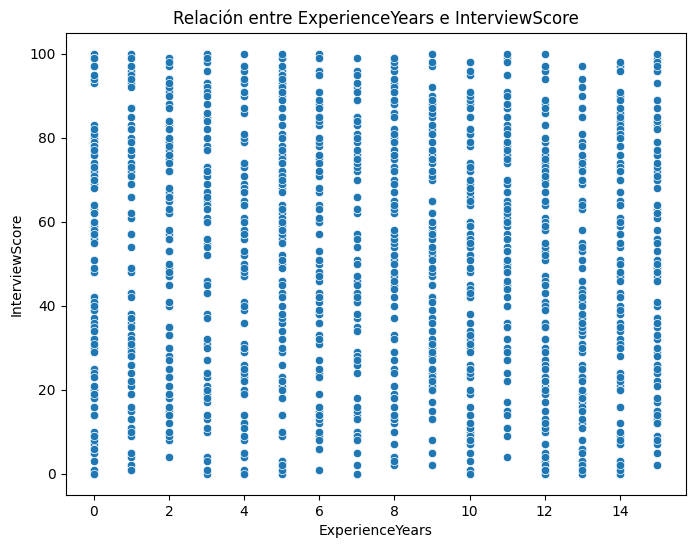

In [84]:
# c) Visualización de relaciones (ejemplo: scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_copia, x='ExperienceYears', y='InterviewScore')
plt.title('Relación entre ExperienceYears e InterviewScore')
plt.show()

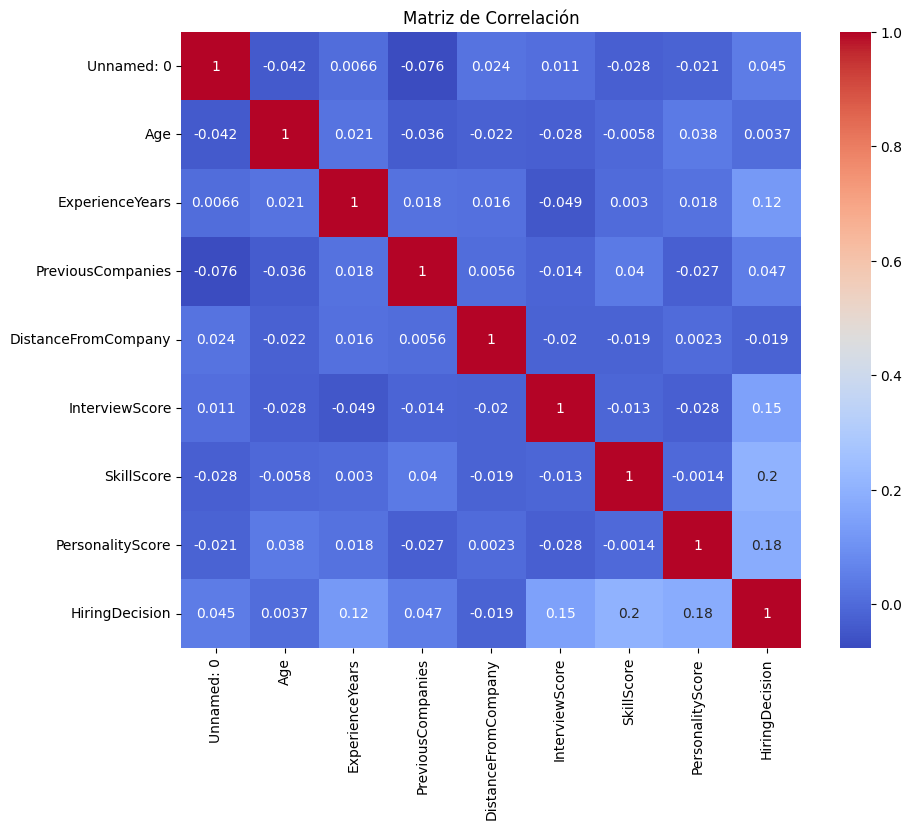

In [87]:
# d) Matriz de correlación
plt.figure(figsize=(10, 8))
numeric_data = data_copia.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Paso N°3

In [52]:
import pandas as pd  # Importa la librería pandas para manipulación de datos
from sklearn.model_selection import train_test_split  # Importa la función para dividir los datos
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Importa funciones para preprocesamiento
from sklearn.compose import ColumnTransformer  # Importa la clase para transformar columnas
from sklearn.linear_model import LogisticRegression  # Importa el modelo de Regresión Logística
from sklearn.metrics import accuracy_score, classification_report  # Importa métricas de evaluación
from sklearn.impute import SimpleImputer # Importa SimpleImputer para la imputación

In [53]:
# 1. Preparar los datos (usando data_copia)
X = data_copia.drop('HiringDecision', axis=1)  # Define las características (X) eliminando la columna objetivo
y = data_copia['HiringDecision']  # Define la variable objetivo (y) como 'HiringDecision'


In [58]:
# Divide los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
# Antes de escalar y codificar, imputa los valores faltantes en X_train y X_test
imputer = SimpleImputer(strategy='most_frequent') # Crea un imputador con la estrategia deseada


In [55]:
# Ajusta el imputador a los datos de entrenamiento y transforma los datos de entrenamiento y prueba
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [60]:
# a) Escalar las variables numéricas
num_features = X.select_dtypes(include=['number']).columns  # Selecciona las columnas numéricas
scaler = StandardScaler()  # Crea una instancia del escalador StandardScaler
X_train[num_features] = scaler.fit_transform(X_train[num_features])  # Escala los datos de entrenamiento
X_test[num_features] = scaler.transform(X_test[num_features])  # Escala los datos de prueba


In [61]:
# b) Codificar las variables categóricas (One-Hot Encoding)
cat_features = X.select_dtypes(include=['object']).columns  # Selecciona las columnas categóricas
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Crea una instancia del codificador
ct = ColumnTransformer(
    transformers=[('encoder', encoder, cat_features)],  # Define la transformación para las columnas categóricas
    remainder='passthrough'  # Mantiene las demás columnas sin cambios
)
X_train = ct.fit_transform(X_train)  # Aplica la transformación a los datos de entrenamiento
X_test = ct.transform(X_test)  # Aplica la transformación a los datos de prueba



In [57]:
# 2. Elegir y entrenar el modelo
modelo = LogisticRegression()  # Crea una instancia del modelo de Regresión Logística
modelo.fit(X_train, y_train)  # Entrena el modelo con los datos de entrenamiento
y_pred = modelo.predict(X_test)  # Realiza predicciones en los datos de prueba


In [62]:
# Mostrar la precisión del modelo
print("Precisión del modelo:", accuracy_score(y_test, y_pred))


Precisión del modelo: 0.8633333333333333


Una precisión del modelo de 0.8633 significa que  ha predicho correctamente la decisión de contratación en el 86.33% de los casos del conjunto de datos de prueba.


In [63]:
# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       215
           1       0.72      0.84      0.78        85

    accuracy                           0.86       300
   macro avg       0.83      0.85      0.84       300
weighted avg       0.87      0.86      0.87       300



El reporte nos muestra que el modelo tiene un mejor rendimiento para predecir la clase 0 ("No contratar") que para la clase 1 ("Contratar"). Esto se refleja en la mayor precisión, recall y F1-score para la clase 0.

Sin embargo, el modelo sigue teniendo un buen rendimiento general, con una precisión del 86%. Es posible que se pueda mejorar el rendimiento para la clase 1 ("Contratar") explorando diferentes técnicas de modelado o ajustando los parámetros del modelo actual.